In [ ]:
!pip install ucimlrepo

In [ ]:
!pip install scikit-learn==1.5.2
!pip install xgboost==2.1.0

In [ ]:
import pandas as pd

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [ ]:
df = bank_marketing.data.features

In [ ]:
df['y']= y

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df2 = df.drop(['contact', 'month','day_of_week'], axis = 1, inplace = False)

In [ ]:
df2.shape

(45211, 14)

**# Paso 3: Análisis de variables univariante**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

IndexError: index 2 is out of bounds for axis 1 with size 2

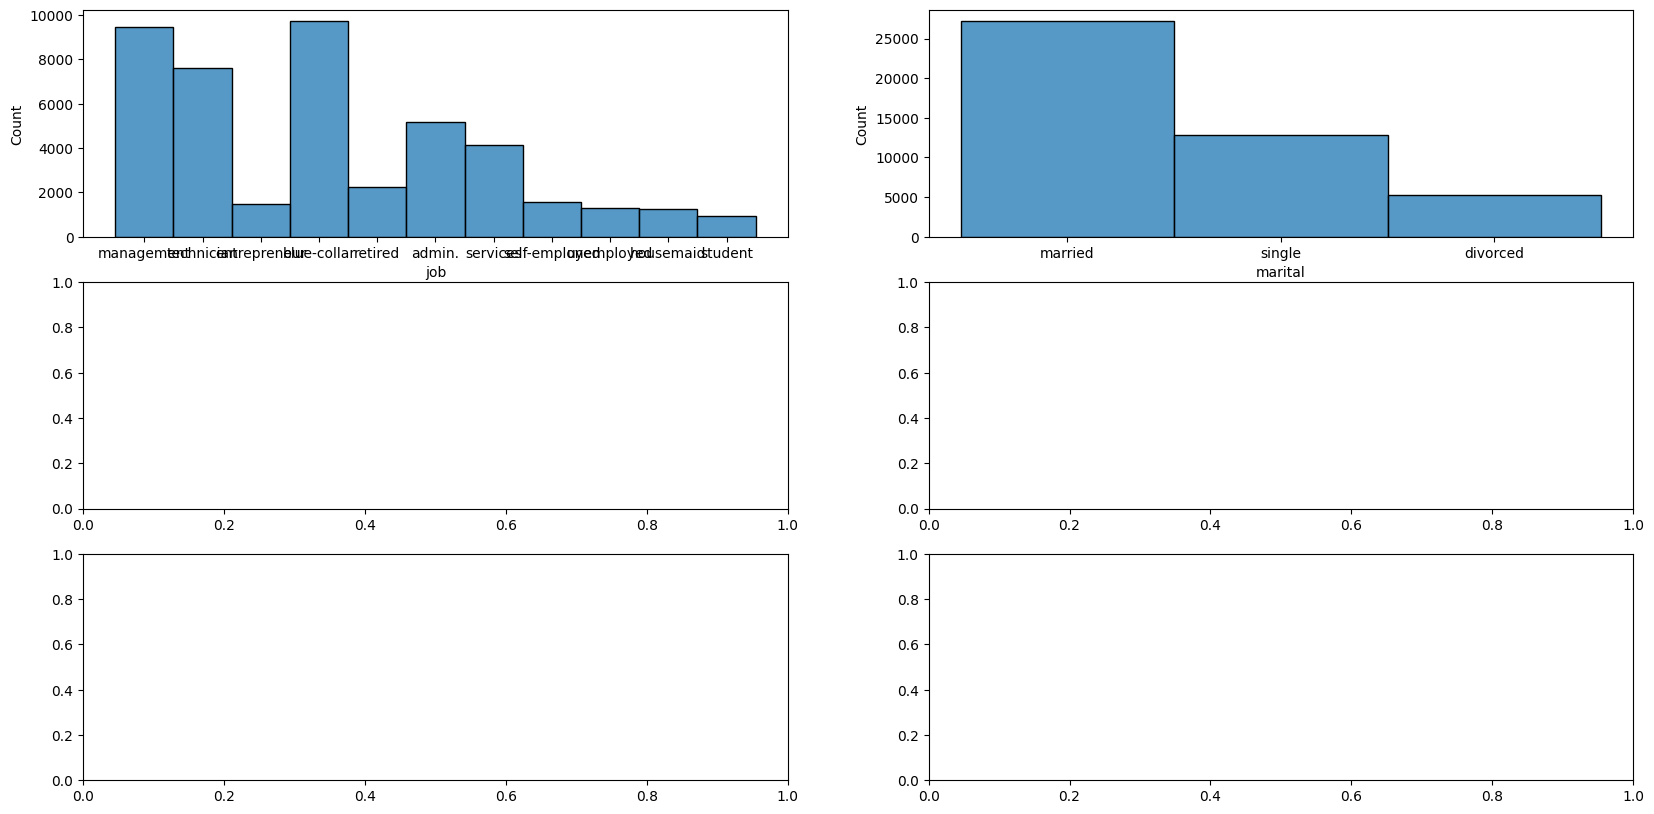

In [ ]:
fig, axis = plt.subplots(3, 2, figsize = (20, 10))
sns.histplot (ax = axis [0, 0], data = df2, x = 'job')
sns.histplot (ax = axis [0, 1], data = df2, x = 'marital')
sns.histplot (ax = axis [0, 2], data = df2, x = 'education')
sns.histplot (ax = axis [1, 0], data = df2, x = 'default')
sns.histplot (ax = axis [1, 1], data = df2, x = 'housing')
sns.histplot (ax = axis [1, 2], data = df2, x = 'loan')

plt.tight_layout()

plt.show()

In [ ]:
fig, axis = plt.subplots(2, 7, figsize = (20, 10), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot (ax = axis [0, 0], data = df2, x = 'age')
sns.boxplot (ax = axis [1, 0], data = df2, x = 'age')
sns.histplot (ax = axis [0, 1], data = df2, x = 'balance')
sns.boxplot (ax = axis [1, 1], data = df2, x = 'balance')
#sns.histplot (ax = axis [0, 2], data = df2, x = 'day_of_week')
#sns.boxplot (ax = axis [1, 2], data = df2, x = 'day_of_week')
sns.histplot (ax = axis [0, 3], data = df2, x = 'duration')
sns.boxplot (ax = axis [1, 3], data = df2, x = 'duration')
sns.histplot (ax = axis [0, 4], data = df2, x = 'campaign')
sns.boxplot (ax = axis [1, 4], data = df2, x = 'campaign')
sns.histplot (ax = axis [0, 5], data = df2, x = 'pdays')
sns.boxplot (ax = axis [1, 5], data = df2, x = 'pdays')
sns.histplot (ax = axis [0, 6], data = df2, x = 'previous')
sns.boxplot (ax = axis [1, 6], data = df2, x = 'previous')

In [ ]:
round(df2.describe(),2)

In [ ]:
df2.info()

In [ ]:
df['y'].value_counts()

In [ ]:
df2["y"] = pd.factorize(df2["y"])[0]

In [ ]:
# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df2, x = "age", y = "y")
sns.heatmap(df2[["age", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df2, x = "balance", y = "y").set(ylabel=None)
sns.heatmap(df2[["balance", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


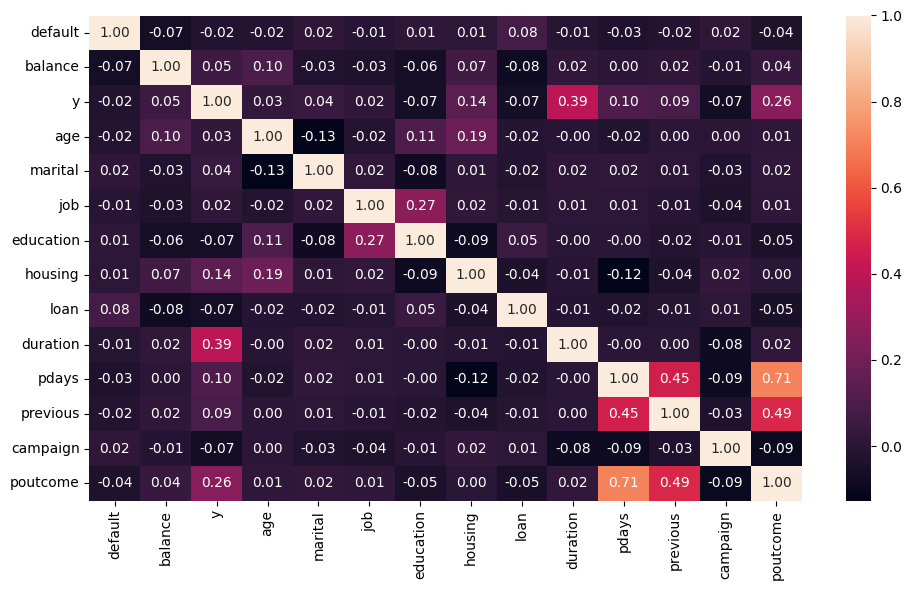

In [ ]:
df2["default"] = pd.factorize(df2["default"])[0]
df2["marital"] = pd.factorize(df2["marital"])[0]
df2["education"] = pd.factorize(df2["education"])[0]
df2["job"] = pd.factorize(df2["job"])[0]
df2["housing"] = pd.factorize(df2["housing"])[0]
df2["loan"] = pd.factorize(df2["loan"])[0]
df2["y"] = pd.factorize(df2["y"])[0]
df2["poutcome"] = pd.factorize(df2["poutcome"])[0]


fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df2[["default", "balance","y", "age", "marital", "job", "education", "housing", "loan", "duration", "pdays", "previous", "campaign","poutcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [ ]:
sns.pairplot(data = df2)

In [ ]:
# Definir los datos "x"
X = df2.drop("y", axis = 1)

In [ ]:
df["y"] = pd.factorize(df["y"])[0]

In [ ]:
y = df["y"]

# **División de los datos para entrentamiento**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
3344,41,3,0,2,0,849,0,0,72,1,-1,0,-1
17965,49,1,0,2,0,1415,0,0,269,2,-1,0,-1
18299,42,5,0,1,0,3842,1,0,130,4,-1,0,-1
10221,37,0,1,0,0,-119,0,0,375,11,-1,0,-1
32192,56,3,0,2,0,3498,1,0,264,2,-1,0,-1


In [ ]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
3776,40,3,0,1,0,580,0,0,192,1,-1,0,-1
9928,47,6,1,1,0,3644,1,0,83,2,-1,0,-1
33409,25,10,1,0,0,538,0,0,226,1,-1,0,-1
31885,42,0,0,0,0,1773,1,0,311,1,336,1,0
15738,56,0,0,0,0,217,1,1,121,2,-1,0,-1


In [ ]:
y_train.value_counts()

,count
y,
no,31970
yes,4198


In [ ]:
y_test.value_counts()

,count
y,
0,7952
1,1091


# Algoritmo de regresión logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear una instancia del modelo de regresión logística
model_log = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model_log.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred_log = model_log.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print (y_pred_log)

[0 0 0 ... 0 0 0]


In [ ]:
# Calcular la exactitud del modelo de regresión logística
accuracy_log = accuracy_score(y_test, y_pred_log)
print (round(accuracy_log, 4))

0.8936


### **`# Árbol de decisión`**

In [ ]:
# Importamos paquete y módulo
from sklearn.tree import DecisionTreeClassifier

# Iniciamos el entrenamiento
model_tree = DecisionTreeClassifier(random_state = 42)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_tree, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

KeyboardInterrupt: 

In [ ]:
y_pred_tree = model_tree.predict(X_test)
print (y_pred_tree)

[0 0 0 ... 0 0 0]


In [ ]:
# Ver profunidad del árbol
model.get_depth()

AttributeError: 'GradientBoostingClassifier' object has no attribute 'get_depth'

In [ ]:
# Medimos 'accuracy' del modelo de arbol
acuracy_tree = accuracy_score(y_test, y_pred_tree)
print(round(acuracy_tree, 4))

0.8548


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(random_state = 42)
model_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_forest = model_forest.predict(X_test)
print(y_pred_forest)

[0 0 0 ... 0 0 0]


In [ ]:
# Calculamos accuracy del modelo de "Random Forest"
accuracy_forest = accuracy_score(y_test, y_pred_forest)
print(round(accuracy_forest, 4))

0.8953


## **Boosting**

In [ ]:
import sklearn
import xgboost

In [ ]:
from xgboost import XGBClassifier

model_boost = XGBClassifier()
model_boost.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_gbc = GradientBoostingClassifier(n_estimators = 5, random_state = 42)

model_gbc.fit(X_train, y_train)

y_pred_gbc = model_gbc.predict(X_test)

In [ ]:
y_pred_gbc = model_gbc.predict(X_test)
print(y_pred_gbc)

[0 0 0 ... 0 0 0]


In [ ]:
# Calculamos accuracy del modelo de "Gradient Boosting"
accuracy_gpc = accuracy_score(y_test, y_pred_forest)
print(round(accuracy_gpc, 4))

0.8953


# Naive **Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_bayesg = GaussianNB()
model_bayesg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


GaussianNB()

In [ ]:
y_pred_bayesg = model_bayesg.predict(X_test)
print(y_pred_bayesg)

[0 0 0 ... 0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  # that has no feature names.


In [ ]:
# Calculamos accuracy del modelo de "Gaussian"
accuracy_bayesg = accuracy_score(y_test, y_pred_bayesg)
print(round(accuracy_bayesg, 4))

0.8535


# Comparación de **accuracys**

In [ ]:
print (accuracy_log)
print (acuracy_tree)
print (accuracy_forest)
print (accuracy_gpc)
print (accuracy_bayesg)

0.8936193741015149
0.8548048214088245
0.8952781156695787
0.8952781156695787
0.8534778281543736


In [ ]:
resultados = [acc]